# Sentiment Analysis on youtube and tiktok appstore, and maybe pytrend 

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from app_store_scraper import AppStore

from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, ENGLISH_STOP_WORDS
from sklearn.feature_extraction import _stop_words
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from nltk import word_tokenize
from nltk.stem.snowball import EnglishStemmer
import matplotlib.pylab as plt
from dmba import printTermDocumentMatrix, classificationSummary, liftChart
import re

# sentiment libs
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\qifan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qifan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# some duplicate libraries are here
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from app_store_scraper import AppStore


from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import nltk
from nltk import word_tokenize
from nltk.stem.snowball import EnglishStemmer
import matplotlib.pylab as plt
from dmba import printTermDocumentMatrix, classificationSummary, liftChart
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer


import nltk
#  nltk.download('punkt')
#  nltk.download('stopwords')

#sentiment libs
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Saved the scraped data into excel file. Don't run code in this session, start from the exploration part , each app scraped 1000 records


In [2]:
" tiktok = AppStore(country='us', app_name='tiktok', app_id = '835599320') "

" tiktok.review(how_many=1000) "

#delete the quotes to scrap 

# this is tiktok review

2023-04-21 14:22:26,587 [INFO] Base - Initialised: AppStore('us', 'tiktok', 835599320)
2023-04-21 14:22:26,598 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/tiktok/id835599320
2023-04-21 14:22:31,607 [INFO] Base - [id:835599320] Fetched 280 reviews (280 fetched in total)
2023-04-21 14:22:37,344 [INFO] Base - [id:835599320] Fetched 560 reviews (560 fetched in total)
2023-04-21 14:22:43,019 [INFO] Base - [id:835599320] Fetched 840 reviews (840 fetched in total)
2023-04-21 14:22:46,637 [INFO] Base - [id:835599320] Fetched 1000 reviews (1000 fetched in total)


In [3]:
# transform the scrapped data

"""" tiktokdf = pd.DataFrame(np.array(tiktok.reviews),columns=['review'])
tiktokdf2 = tiktokdf.join(pd.DataFrame(tiktokdf.pop('review').tolist())) """"

In [17]:
# writer_123 = pd.ExcelWriter('C:/Users/qifan/OneDrive/Documents/MDA 720/Tiktokdf.xlsx', engine='xlsxwriter')

# tiktokdf2.to_excel(writer_123, sheet_name='emails', index=False)

# writer_123.save()



# #download as excel

In [ ]:
#  Youtube data

In [18]:
"""""   youtube = AppStore(country='us', app_name='YouTube', app_id = '544007664')

youtube.review(how_many=1000)     """""

#delete the quotes to scrap 

# this is youtube review

2023-04-21 14:58:51,032 [INFO] Base - Initialised: AppStore('us', 'youtube', 544007664)
2023-04-21 14:58:51,034 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/youtube/id544007664
2023-04-21 14:58:56,204 [INFO] Base - [id:544007664] Fetched 320 reviews (320 fetched in total)
2023-04-21 14:59:01,694 [INFO] Base - [id:544007664] Fetched 640 reviews (640 fetched in total)
2023-04-21 14:59:07,109 [INFO] Base - [id:544007664] Fetched 980 reviews (980 fetched in total)
2023-04-21 14:59:07,415 [INFO] Base - [id:544007664] Fetched 1000 reviews (1000 fetched in total)


In [21]:
""""  youtubedf = pd.DataFrame(np.array(youtube.reviews),columns=['review'])
      youtubedf2 = youtubedf.join(pd.DataFrame(youtubedf.pop('review').tolist())) """"

,date,review,rating,isEdited,title,userName
0,2020-08-06 19:50:44,"Why do you censor everything, literally everyo...",5,False,So many things bad,Tomoenage
1,2022-08-22 16:24:20,If the video goes into an ad then I lose my sp...,1,False,"Comments, ads, restrictions.",v87878787
2,2022-05-12 04:30:36,Please stop the censorship. Let people communi...,2,False,Bring Back Downvotes,hgighjb
3,2022-04-29 15:49:56,I love YT and understand it needs ad revenue b...,4,False,Too many ads and too long,Kokoemo
4,2023-01-13 05:16:16,I like the diverse content available but abhor...,3,False,Content and censorship,Bloomwish
...,...,...,...,...,...,...
995,2018-08-18 16:24:24,I usually wouldn’t update an app unless there ...,2,False,New update,ToriLenays
996,2018-04-06 00:18:01,"I don’t want to sound ungrateful, but a recent...",4,False,There is an annoying bug that NEEDS fixing.,BillyofBob
997,2018-05-18 11:30:52,Why are the thumbs up and thumbs down buttons ...,3,False,My “likes” and “dislikes” are not counted,songbirdmc
998,2018-02-16 07:08:03,"Great when it’s working, but lately the app ha...",3,False,Latest updates keeps freezing!!,Jamesqin1


In [24]:
# writer_1234 = pd.ExcelWriter('C:/Users/qifan/OneDrive/Documents/MDA 720/Youtubedf.xlsx', engine='xlsxwriter')

# youtubedf2.to_excel(writer_1234, sheet_name='youtube_df', index=False)

# writer_1234.save()



# download as excel

# Data exploration tiktok

In [2]:
# read local excel file instead of using scraped file everytime opening this file

In [3]:
tiktokdf2= pd.read_excel("C:/Users/qifan/OneDrive/Documents/MDA 720/Tiktokdf.xlsx")
youtubedf2=pd.read_excel("C:/Users/qifan/OneDrive/Documents/MDA 720/Youtubedf.xlsx")

In [4]:
tiktokdf2.head()

,date,review,rating,isEdited,userName,title,developerResponse
0,2023-03-27 03:02:00,Tiktok is literally one of the best + most use...,5,False,balsam7777,Best app ever,NaN
1,2023-03-06 00:14:07,*The Drafts*: I love this app and what the new...,3,False,Chevynae,"Great app, few adjustments",NaN
2,2023-03-30 02:17:30,Tiktok provides a place for people to connect ...,5,False,katrinaA1988,Freedom to be myself,NaN
3,2023-04-17 18:09:43,Upsides: The app allows ppl to find community ...,5,False,doublepenny,"TikTok, The Last Frontier",NaN
4,2023-03-31 10:37:04,"Hey everybody, my name is Asher’s, and I want ...",5,False,Sarahjanejarm,TikTok and Mental Wellness,NaN


In [5]:
tiktokdf2.dtypes

date                 datetime64[ns]
review                       object
rating                        int64
isEdited                       bool
userName                     object
title                        object
developerResponse            object
dtype: object

In [6]:
len(tiktokdf2)

1000

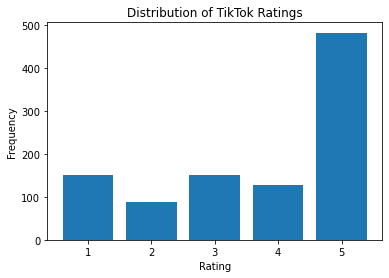

In [7]:
import matplotlib.pyplot as plt

counts = tiktokdf2['rating'].value_counts(ascending=False)

plt.bar(counts.index, counts.values)

plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.title('Distribution of TikTok Ratings')

plt.show()


In [8]:
tiktokdf2['rating'].value_counts(ascending=False)


5    483
3    151
1    151
4    127
2     88
Name: rating, dtype: int64

# data exploration youtube

In [9]:
youtubedf2.head()

,date,review,rating,isEdited,title,userName
0,2020-08-06 19:50:44,"Why do you censor everything, literally everyo...",5,False,So many things bad,Tomoenage
1,2022-08-22 16:24:20,If the video goes into an ad then I lose my sp...,1,False,"Comments, ads, restrictions.",v87878787
2,2022-05-12 04:30:36,Please stop the censorship. Let people communi...,2,False,Bring Back Downvotes,hgighjb
3,2022-04-29 15:49:56,I love YT and understand it needs ad revenue b...,4,False,Too many ads and too long,Kokoemo
4,2023-01-13 05:16:16,I like the diverse content available but abhor...,3,False,Content and censorship,Bloomwish


In [10]:
youtubedf2.dtypes
len(youtubedf2)


1000

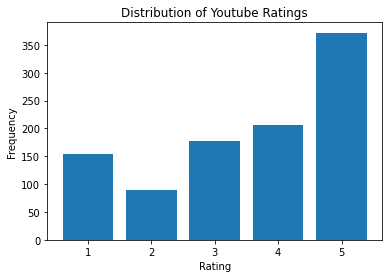

In [11]:
counts_1 = youtubedf2['rating'].value_counts(ascending=False)

plt.bar(counts_1.index, counts_1.values)

plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.title('Distribution of Youtube Ratings')

plt.show()


In [12]:
youtubedf2['rating'].value_counts(ascending=False)

5    372
4    207
3    178
1    154
2     89
Name: rating, dtype: int64

In [13]:
# rating comparison 

In [14]:
#
print('tiktok rating median is',np.median(tiktokdf2['rating']))
print('youtube rating median is',np.median(youtubedf2['rating']))

tiktok rating median is 4.0
youtube rating median is 4.0


In [15]:
tiktokdf2['rating'].value_counts(ascending=False)

5    483
3    151
1    151
4    127
2     88
Name: rating, dtype: int64

In [16]:
youtubedf2['rating'].value_counts(ascending=False)

5    372
4    207
3    178
1    154
2     89
Name: rating, dtype: int64

In [17]:
# converting 123 to 0 and 4,5 to 1 on sentiment , to two category

In [18]:
#
# Assign 0 for reviews <= 3 (negative sentiment)
tiktokdf2.loc[tiktokdf2['rating'] <= 3, 'sentiment'] = 0

# Assign 1 for reviews > 3 (positive sentiment)
tiktokdf2.loc[tiktokdf2['rating'] > 3, 'sentiment'] = 1


In [19]:
#convert float sentiment to int
tiktokdf2['sentiment'] = tiktokdf2['sentiment'].astype(int)

In [20]:
#
# Assign 0 for reviews <= 3 (negative sentiment)
youtubedf2.loc[youtubedf2['rating'] <= 3, 'sentiment'] = 0

# Assign 1 for reviews > 3 (positive sentiment)
youtubedf2.loc[youtubedf2['rating'] > 3, 'sentiment'] = 1


In [21]:
youtubedf2['sentiment'] =youtubedf2['sentiment'].astype(int)

In [22]:
tiktokdf2['sentiment'].value_counts()

1    610
0    390
Name: sentiment, dtype: int64

In [23]:
youtubedf2['sentiment'].value_counts()

1    579
0    421
Name: sentiment, dtype: int64

In [24]:
youtubedf2

,date,review,rating,isEdited,title,userName,sentiment
0,2020-08-06 19:50:44,"Why do you censor everything, literally everyo...",5,False,So many things bad,Tomoenage,1
1,2022-08-22 16:24:20,If the video goes into an ad then I lose my sp...,1,False,"Comments, ads, restrictions.",v87878787,0
2,2022-05-12 04:30:36,Please stop the censorship. Let people communi...,2,False,Bring Back Downvotes,hgighjb,0
3,2022-04-29 15:49:56,I love YT and understand it needs ad revenue b...,4,False,Too many ads and too long,Kokoemo,1
4,2023-01-13 05:16:16,I like the diverse content available but abhor...,3,False,Content and censorship,Bloomwish,0
...,...,...,...,...,...,...,...
995,2018-08-18 16:24:24,I usually wouldn’t update an app unless there ...,2,False,New update,ToriLenays,0
996,2018-04-06 00:18:01,"I don’t want to sound ungrateful, but a recent...",4,False,There is an annoying bug that NEEDS fixing.,BillyofBob,1
997,2018-05-18 11:30:52,Why are the thumbs up and thumbs down buttons ...,3,False,My “likes” and “dislikes” are not counted,songbirdmc,0
998,2018-02-16 07:08:03,"Great when it’s working, but lately the app ha...",3,False,Latest updates keeps freezing!!,Jamesqin1,0


In [25]:
# perform stop words to make new column clean_review to both tiktok and youtube

stp_words = stopwords.words('english')

def clean_review(review):
  clean_review = " ".join(word for word in review.split() if word not in stp_words)
  return clean_review

tiktokdf2['clean_review'] = tiktokdf2['review'].apply(clean_review)


In [26]:
# cleaning the review from youtube
stp_words = stopwords.words('english')

def clean_review(review):
  clean_review = " ".join(word for word in review.split() if word not in stp_words)
  return clean_review

youtubedf2['clean_review'] = youtubedf2['review'].apply(clean_review)


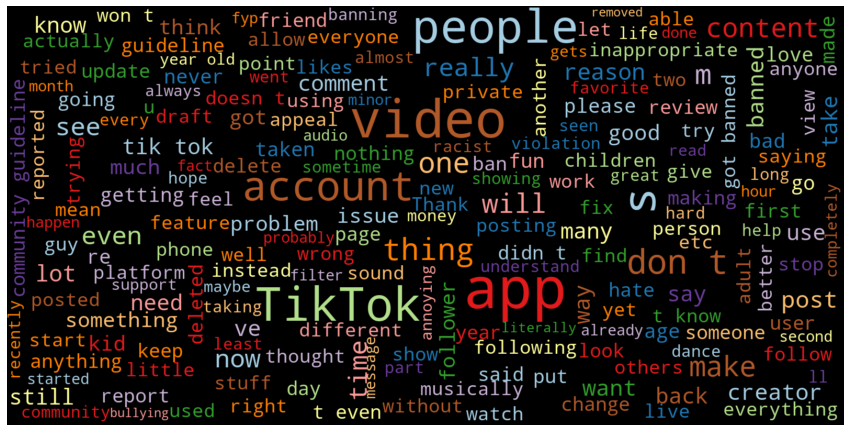

In [71]:
from wordcloud import WordCloud

# tiktok 1,2,3 star rating wordcloud
consolidated=' '.join(word for word in tiktokdf2['review'][tiktokdf2['sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110, colormap='Paired')
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


In [70]:
# # most frequent 30 words 1,2,3 star rating tiktok
# freq_dict = wordCloud.process_text(consolidated)
# sorted_dict = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
# for i, (word, freq) in enumerate(sorted_dict[:40]):
#     print(f"{i+1}. {word}: {freq}")

In [72]:
# most frequen 40 words rating 1,2,3
freq_dict = wordCloud.process_text(consolidated)
sorted_dict = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

for i in range(0, min(len(sorted_dict), 40), 20):
    batch = sorted_dict[i:i+20]
    for j, (word, freq) in enumerate(batch):
        print(f"{i+j+1}. {word}: {freq}")
    print()


1. app: 1160
2. video: 951
3. TikTok: 743
4. people: 723
5. s: 717
6. account: 562
7. don t: 376
8. thing: 292
9. one: 265
10. make: 258
11. m: 247
12. content: 229
13. will: 227
14. now: 212
15. see: 210
16. really: 209
17. even: 208
18. time: 207
19. post: 170
20. lot: 164

21. reason: 163
22. creator: 157
23. ve: 156
24. want: 156
25. banned: 155
26. many: 151
27. back: 150
28. comment: 147
29. need: 146
30. still: 145
31. way: 145
32. know: 143
33. use: 141
34. take: 141
35. say: 138
36. tik tok: 135
37. good: 130
38. problem: 126
39. got: 126
40. issue: 125



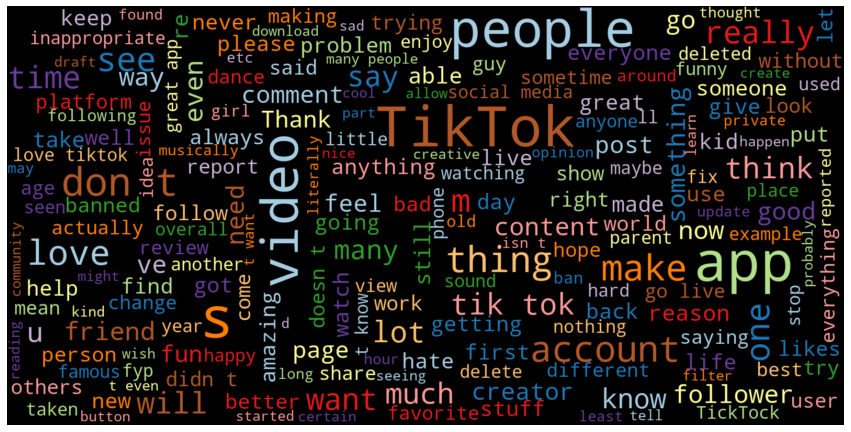

In [73]:
# word-cloud 4,5 star, tiktok
consolidated=' '.join(word for word in tiktokdf2['review'][tiktokdf2['sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110, colormap='Paired')
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [74]:
# most frequent 40 words 4,5 star rating tiktok
freq_dict = wordCloud.process_text(consolidated)
sorted_dict = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

for i in range(0, min(len(sorted_dict), 40), 20):
    batch = sorted_dict[i:i+20]
    for j, (word, freq) in enumerate(batch):
        print(f"{i+j+1}. {word}: {freq}")
    print()

1. s: 1267
2. TikTok: 1208
3. app: 1195
4. people: 1039
5. video: 1022
6. don t: 533
7. account: 453
8. make: 448
9. thing: 444
10. love: 407
11. see: 380
12. one: 371
13. m: 363
14. really: 325
15. time: 322
16. will: 303
17. want: 301
18. think: 291
19. tik tok: 291
20. lot: 286

21. much: 272
22. say: 269
23. know: 243
24. u: 243
25. many: 234
26. even: 227
27. now: 219
28. friend: 216
29. way: 214
30. content: 206
31. follower: 205
32. need: 203
33. go: 203
34. ve: 200
35. something: 196
36. good: 191
37. post: 186
38. comment: 186
39. feel: 185
40. creator: 182



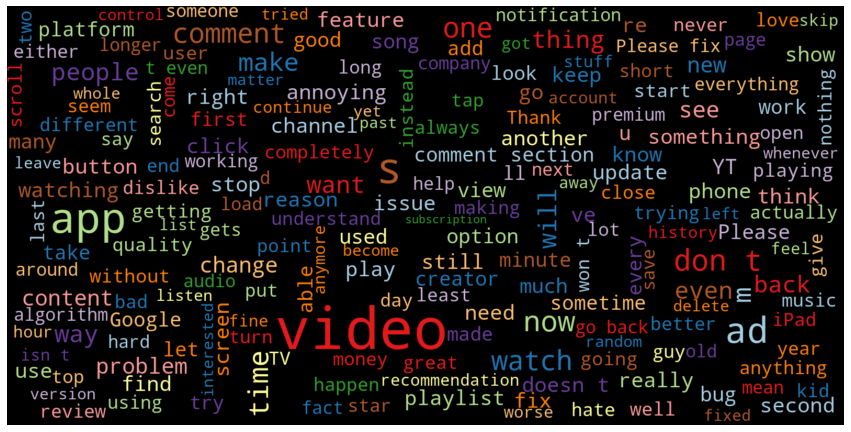

In [76]:
#  YOUTUBE 

# youtube 1,2,3 star rating wordcloud
consolidated=' '.join(word for word in youtubedf2['review'][youtubedf2['sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110, colormap='Paired')
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


In [77]:
# most frequent 40 words 1,2,3 star rating youtube
freq_dict = wordCloud.process_text(consolidated)
sorted_dict = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

for i in range(0, min(len(sorted_dict), 40), 20):
    batch = sorted_dict[i:i+20]
    for j, (word, freq) in enumerate(batch):
        print(f"{i+j+1}. {word}: {freq}")
    print()

1. video: 1108
2. s: 554
3. app: 545
4. ad: 372
5. don t: 236
6. now: 229
7. one: 223
8. time: 211
9. comment: 204
10. watch: 204
11. m: 187
12. make: 180
13. will: 172
14. want: 160
15. thing: 158
16. people: 157
17. way: 154
18. even: 153
19. back: 145
20. see: 136

21. problem: 123
22. change: 121
23. content: 119
24. new: 117
25. play: 108
26. really: 106
27. watching: 105
28. use: 105
29. something: 104
30. phone: 104
31. playlist: 103
32. annoying: 101
33. button: 101
34. screen: 99
35. need: 98
36. know: 97
37. ve: 97
38. issue: 97
39. channel: 96
40. update: 94



In [75]:
# most frequent 30 words 1,2,3 star rating youtube
# freq_dict = wordCloud.process_text(consolidated)
# sorted_dict = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
# for i, (word, freq) in enumerate(sorted_dict[:30]):
#     print(f"{i+1}. {word}: {freq}")

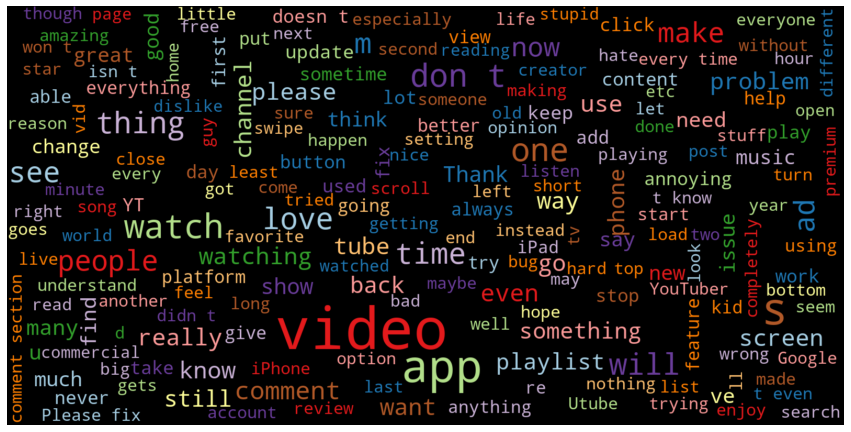

In [78]:
#  YOUTUBE 

# youtube 4,5 star rating wordcloud
consolidated=' '.join(word for word in youtubedf2['review'][youtubedf2['sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110, colormap='Paired')
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


In [79]:
# most frequent 30 words 4,5 star rating youtube
freq_dict = wordCloud.process_text(consolidated)
sorted_dict = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

for i in range(0, min(len(sorted_dict), 40), 20):
    batch = sorted_dict[i:i+20]
    for j, (word, freq) in enumerate(batch):
        print(f"{i+j+1}. {word}: {freq}")
    print()

1. video: 1056
2. app: 595
3. s: 582
4. watch: 289
5. one: 274
6. don t: 267
7. thing: 228
8. will: 225
9. love: 223
10. time: 217
11. see: 212
12. m: 212
13. ad: 205
14. people: 204
15. make: 199
16. now: 183
17. comment: 161
18. even: 150
19. use: 144
20. go: 144

21. tube: 143
22. really: 142
23. problem: 141
24. screen: 140
25. know: 138
26. watching: 137
27. channel: 137
28. way: 134
29. want: 134
30. please: 133
31. back: 130
32. still: 130
33. phone: 125
34. playlist: 123
35. something: 122
36. Thank: 119
37. show: 119
38. many: 116
39. u: 113
40. need: 112



In [31]:
# tiktok logicstic regression

# shows how relevant a word to the text

# Term Frequency-inverse Document Frequency, statistical method to evaluate importance of a word

#The meaning increases proportionally to the number of times in the text a word appears 
#          but is compensated by the word frequency in the corpus (data-set)

In [106]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(tiktokdf2['review'] ).toarray()

In [107]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,tiktokdf2['sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
 
#Model fitting
model.fit(x_train,y_train)
 
#testing the model
pred=model.predict(x_test)
 
#model accuracy
print('accuracy',accuracy_score(y_test,pred))

# the accuracy for using the review to predict it's sentiment or 1,2,3 star rating or 4,5 star rating

accuracy 0.684


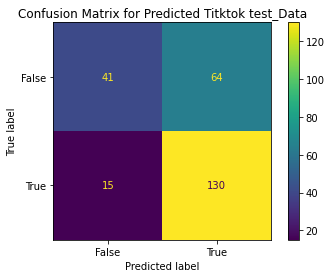

In [109]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = [False, True])
 
cm_display.plot()
plt.title('Confusion Matrix for Predicted Titktok test_Data')
plt.show()

# 250 predicted test_set of tiktok data

In [110]:
# youtube logistic regression

In [111]:
cv_1 = TfidfVectorizer(max_features=2500)
X_1 = cv_1.fit_transform(youtubedf2['review'] ).toarray()

In [112]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X_1,youtubedf2['sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
 
#Model fitting
model.fit(x_train,y_train)
 
#testing the model
pred=model.predict(x_test)
 
#model accuracy
print('accuracy',accuracy_score(y_test,pred_1))

accuracy 0.616


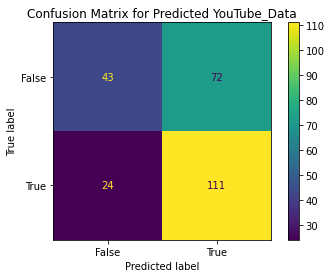

In [114]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix for Predicted YouTube_Data')
plt.show()

# 250 predicted test_set of youtube data

In [41]:
# Pytrend

In [80]:
from pytrends.request import TrendReq
pytrends= TrendReq(hl='en-US', tz=360)

In [96]:
kw_list1 = ["Youtube","TikTok", "Video", "Internet",'Content Creator']
pytrends.build_payload(kw_list1, cat=0, timeframe='today 5-y', geo='')   # 5 years back



# has error run it google colab

<AxesSubplot:xlabel='date'>

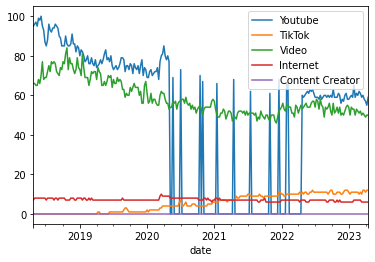

In [97]:
iot = pytrends.interest_over_time()
iot.plot()

# has error in graph run on google colab